# DSP Scaling Package
This notebook corresponds to dsp_scaling.py and explains how to use the main functions within the file. First, we'll import a few libraries for better visualization and interaction with the results. Since the audio samples seem to be too large to embed, you can run the ipy.Audio() segments to listen to the audio clips throughout the tutorial.

In [1]:
import os
import IPython.display as ipy
import scipy.io.wavfile as wav
import dsp_scaling as scale

---
# Time Stretching
There are three functions in this category. Each function is built for a different processing need:
1. Scaling an audio sample inline without messing with files
2. Scaling a specified file, where you have the option to save the output
3. Scaling an entire folder for when you want to time scale multiple files in one command

## Time Stretching an Audio Sample (1)
Let's assume that in some workflow, you have read in and opened a .wav file. You can listen to the original clip we'll be using throughout the tutorial.

In [16]:
filepath = os.path.join('files', '20190611_202000.WAV')
Fs, audio = wav.read(filepath)

In [ ]:
ipy.Audio(audio, rate=Fs)

With the file open now as an array with sampling rate Fs, we can time stretch it. Below, I've chosen to speed it up by a factor of 2. You can see the input and output spectrograms below as well as listen to the scaled version.

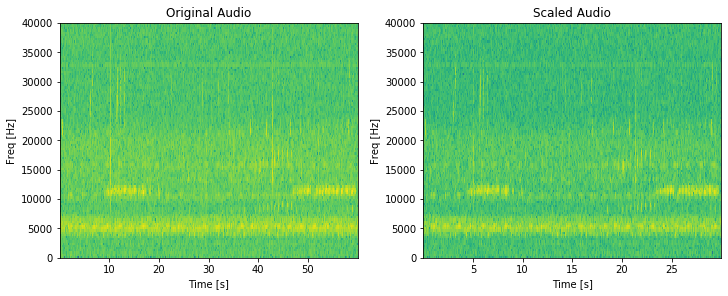

In [3]:
stretchedAudio = scale.time_stretch(2.0, audio)
scale.plot_specgrams(audio, stretchedAudio, Fs)

In [ ]:
ipy.Audio(stretchedAudio, rate=Fs)

## Time Stretching a Single File (2)
We can also directly time stretch a file with the command below. The spectrograms and audio clips won't be regenerated since they are the same as above. The parameters for this function are:
- factor
- filename
- folder
- out
- write

where folder, out, and write are optional. For files in the current working directory, there is no need to specify a folder. The 'write' option is set to False by default, but it can be enabled along with the output file name. Below, we will demonstrate how to time stretch a file with and without saving.

In [6]:
stretchedAudio = scale.time_stretch_file(2.0, '20190611_202000.WAV', folder='files')

In [14]:
scale.time_stretch_file(2.0, '20190611_202000.WAV', folder='files', out='timeStretched.WAV', write=True)

(384000, array([  83,  -30, -229, ..., -107, -132,  -71], dtype=int16))

## Time Stretching All Files Within a Folder (3)
Lastly, we can time stretch all valid .wav files within a specified folder. This function will create a new directory to save all the scaled files. This output directory name can be specified, but it is 'stretchedDir' by default.

In [8]:
print('Before Function Call: ', os.path.exists('timeStretchedFiles'))
scale.time_stretch_folder(2.0, 'files', outDir='timeStretchedFiles')
print('After Function Call: ', os.path.exists('timeStretchedFiles'))

Before Function Call:  False


/mnt/c/Users/danie/Documents/UCSD/automated_acoustic_species_identification/passive-acoustic-biodiversity/dsp_scaling.py:118: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, data = wav.read(filepath)


After Function Call:  True


---
# Pitch Shifting
There are four functions in this category. Each function is built for a different processing need:
1. Scaling an audio sample inline without messing with files
2. Scaling a specified file, where you have the option to save the output
3. Scaling an entire folder for when you want to time scale multiple files in one command
4. Isolating a specified band and shifting it into the human hearing range (for ultrasonic vocalizations)

## Pitch Shifting an Audio Sample (1)
The first three functions of pitch shifting are very similar to the time stretching variant. Let's assume that in some workflow, you have read in and opened a .wav file.

With the file open now as an array with sampling rate Fs, we can pitch shift it. Below, I've chosen the 'center' origFreq to be 15kHz and we want it brought down to the targetFreq of 4kHz.

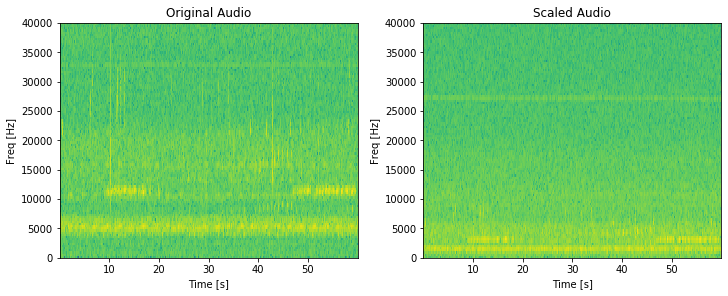

In [9]:
shiftedAudio = scale.pitch_shift(4000, 15000, Fs, audio)
scale.plot_specgrams(audio, shiftedAudio, Fs)

In [ ]:
ipy.Audio(shiftedAudio, rate=Fs)

## Pitch Shifting a Single File (2)
We can also directly pitch shift a file with the command below. The spectrograms and audio clips won't be regenerated since they are the same as above. The parameters for this function are:
- targetFreq
- origFreq
- filename
- folder
- out
- write

where folder, out, and write are optional. For files in the current working directory, there is no need to specify a folder. The 'write' option is set to False by default, but it can be enabled along with the output file name. Below, we will demonstrate how to pitch shift a file with and without saving.

In [10]:
shiftedAudio = scale.pitch_shift_file(4000, 15000, '20190611_202000.WAV', folder='files')

In [13]:
scale.pitch_shift_file(4000, 15000, '20190611_202000.WAV', folder='files', out='pitchShifted.WAV', write=True)

(384000, array([  78,   79,   56, ..., -160, -106,  -50], dtype=int16))

## Pitch Shifting All Files Within a Folder (3)
Lastly, we can pitch shift all valid .wav files within a specified folder. This function will create a new directory to save all the scaled files. This output directory name can be specified, but it is 'shiftedDir' by default.

In [11]:
print('Before Function Call: ', os.path.exists('pitchShiftedFiles'))
scale.pitch_shift_folder(4000, 15000, 'files', outDir='pitchShiftedFiles')
print('After Function Call: ', os.path.exists('pitchShiftedFiles'))

Before Function Call:  False


/mnt/c/Users/danie/Documents/UCSD/automated_acoustic_species_identification/passive-acoustic-biodiversity/dsp_scaling.py:188: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, data = wav.read(filepath)


After Function Call:  True


## Isolating and Pitch Shifting a Segment (4)
This acts similarly to the other pitch shift functions, with the sole difference being the ability to specify a lower and upper bound for frequencies you want to keep. The function will apply a bandpass filter to attenuate all other frequencies and shift this band to the human hearing range for listening and analysis. Below, we choose to keep the 10kHz just above the human hearing range.

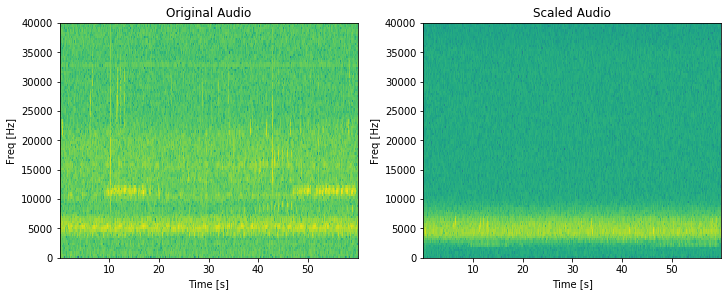

In [12]:
isolatedAudio = scale.pitch_shift_freq_range(20000, 30000, Fs, audio)
scale.plot_specgrams(audio, isolatedAudio, Fs)

In [ ]:
ipy.Audio(isolatedAudio, rate=Fs)